---
# Crash Course Python for Data Science — Predictive Modelling
---
# 02 - Classification modelling
---
## STOP! BEFORE GOING ANY FURTHER...  

Remember, this exercises are open book, open neighbour, open everything! Try to do them on your own before looking at the solution samples.

---

## Exercise

Run this cell to load the Titanic data:

In [45]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression       
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score 

# Set plot preference
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

# time
import time

print('Libraries imported.')

Libraries imported.


Then, train a [Logistic Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba), [Decision Tree](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), or [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) model. Use any features and parameters you want. 

Try to get better than 78.0% accuracy on the test set! (This is not required, but encouraged.)

Do refer to the lecture notebook — but try not to copy-paste.

> You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons. —*[Learn Python the Hard Way](https://learnpythonthehardway.org/book/intro.html)*

After this, you may want to try [Kaggle's Titanic challenge](https://www.kaggle.com/c/titanic)!

Again, I've written an example solution covereing everything, from exploratory data analysis (cleaning data and all that) to model evaluation for you to see the whole process. I strongly encourage you to come up with your own solution before looking at mine!

In [46]:
# Run this to split your data into train and test

train, test = train_test_split(sns.load_dataset('titanic').drop(columns=['alive']), random_state=0)
target = 'survived'

## 1. Exploratory Data Analysis


In [47]:
#@title Double click here for a sample solution
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 668 entries, 105 to 684
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     668 non-null    int64   
 1   pclass       668 non-null    int64   
 2   sex          668 non-null    object  
 3   age          535 non-null    float64 
 4   sibsp        668 non-null    int64   
 5   parch        668 non-null    int64   
 6   fare         668 non-null    float64 
 7   embarked     666 non-null    object  
 8   class        668 non-null    category
 9   who          668 non-null    object  
 10  adult_male   668 non-null    bool    
 11  deck         156 non-null    category
 12  embark_town  666 non-null    object  
 13  alone        668 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(4)
memory usage: 60.5+ KB


#### Feature description

- `survived`:    Survival  
- `pclass`:    Ticket class     
- `sex`:    Sex     
- `age`:    Age in years     
- `sibsp`:    # of siblings / spouses aboard the Titanic     
- `parch`:    # of parents / children aboard the Titanic         
- `fare`:    Passenger fare     
- `deck`:    Deck    
- `embarked`: Port of Embarkation
- `embark_town`: Town of Embarkation
- `alone`: if person was travelling alone or not
- `who`: male or female
- `adult_male`: If person was male or not

In [48]:
# Examine the structure of the dataset
train.info()

# View the first few rows of the dataset
train.head()


<class 'pandas.core.frame.DataFrame'>
Index: 668 entries, 105 to 684
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     668 non-null    int64   
 1   pclass       668 non-null    int64   
 2   sex          668 non-null    object  
 3   age          535 non-null    float64 
 4   sibsp        668 non-null    int64   
 5   parch        668 non-null    int64   
 6   fare         668 non-null    float64 
 7   embarked     666 non-null    object  
 8   class        668 non-null    category
 9   who          668 non-null    object  
 10  adult_male   668 non-null    bool    
 11  deck         156 non-null    category
 12  embark_town  666 non-null    object  
 13  alone        668 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(4)
memory usage: 60.5+ KB


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
105,0,3,male,28.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,True
68,1,3,female,17.0,4,2,7.9250,S,Third,woman,False,NaN,Southampton,False
253,0,3,male,30.0,1,0,16.1000,S,Third,man,True,NaN,Southampton,False
320,0,3,male,22.0,0,0,7.2500,S,Third,man,True,NaN,Southampton,True
706,1,2,female,45.0,0,0,13.5000,S,Second,woman,False,NaN,Southampton,True


### `age` vs `sex`

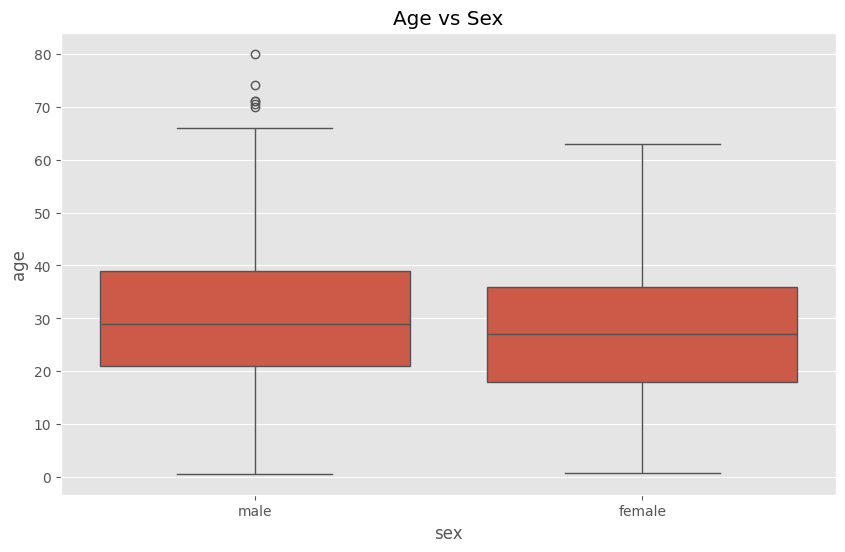

In [49]:
# Visualization: Age distribution by gender
sns.boxplot(x='sex', y='age', data=train)
plt.title('Age vs Sex')
plt.show()

Seems pretty clear that `sex` has to do with survival probability

### `embarked`, `pclass` and `sex`

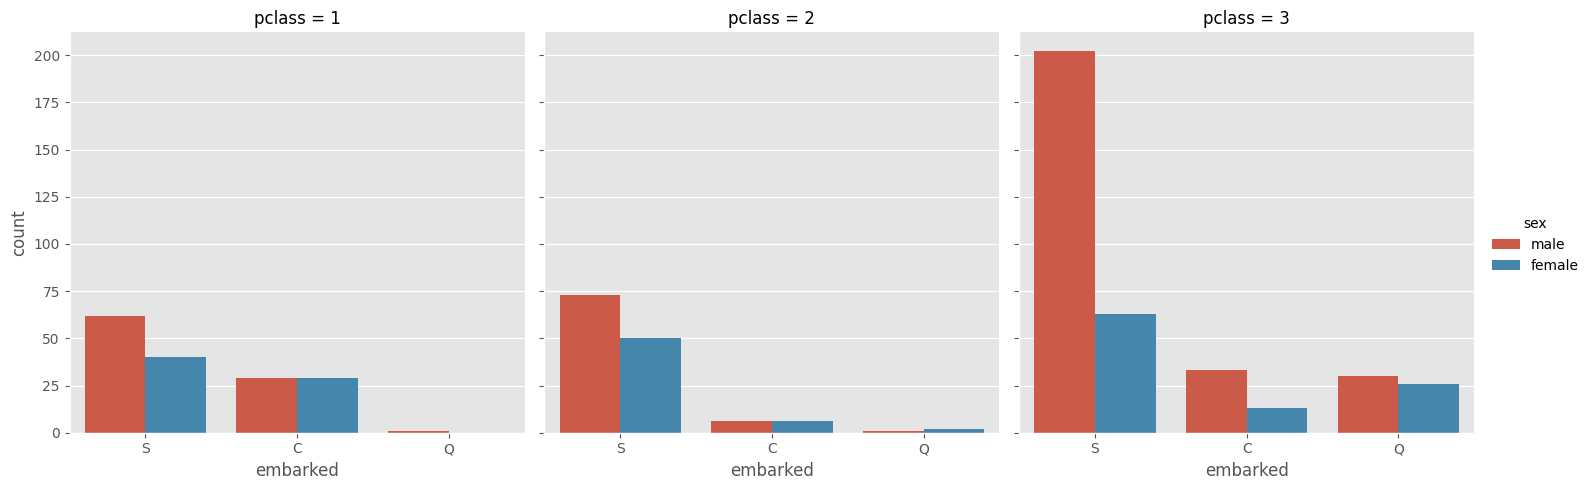

In [50]:
# Visualization: Survival rate by embarked, pclass, and sex
sns.catplot(x='embarked', hue='sex', col='pclass', data=train, kind='count')
plt.show()

`embarked` seems correlated with survival depending on gender, as `pclass`

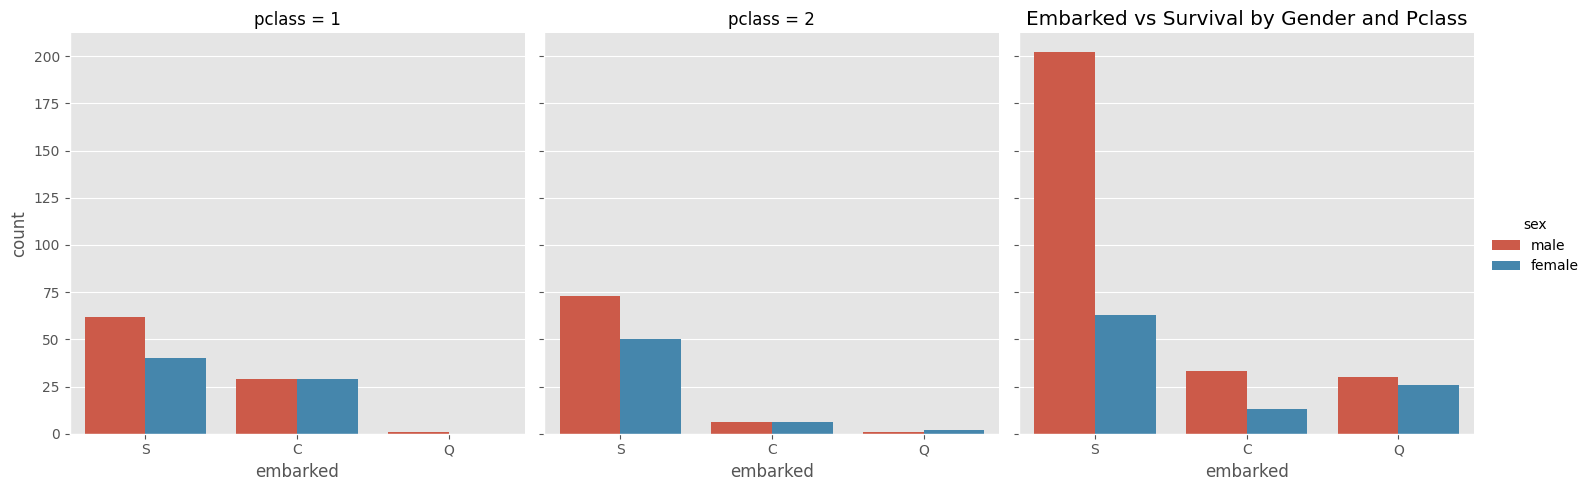

In [51]:
# Visualize the relationship between 'embarked', 'pclass', and 'sex' with survival
sns.catplot(x='embarked', hue='sex', col='pclass', kind='count', data=train)
plt.title('Embarked vs Survival by Gender and Pclass')
plt.show()


`pclass` appears to be contributing to survival

C:\Users\Administrator\AppData\Local\Temp\ipykernel_24340\1211990764.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='pclass', y='survived', data=train, ci=None)


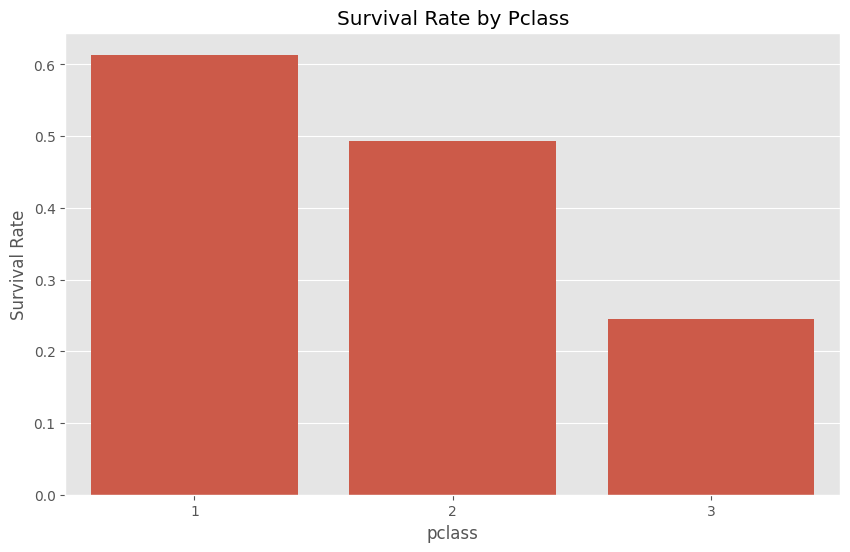

In [52]:
# Visualize survival distribution across 'pclass'
sns.barplot(x='pclass', y='survived', data=train, ci=None)
plt.title('Survival Rate by Pclass')
plt.ylabel('Survival Rate')
plt.show()


Assumption about `pclass` 1 contributing ti survival appears true. There seems to be a low probability of persons in `pclass` 3 not surviving.

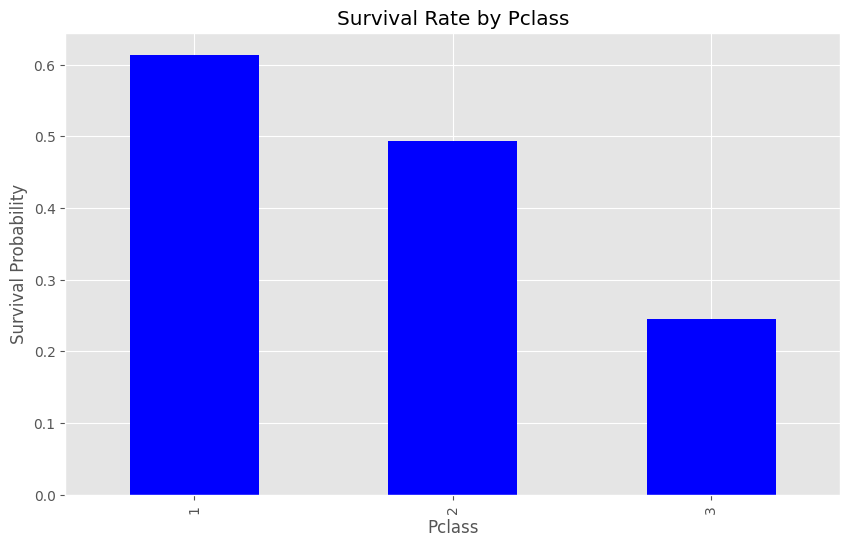

In [53]:
# Check survival rates within each 'pclass'
train.groupby('pclass')['survived'].mean().plot(kind='bar', color='blue')
plt.title('Survival Rate by Pclass')
plt.ylabel('Survival Probability')
plt.xlabel('Pclass')
plt.show()


Seems like younger people travelling alone have a higher probability or survival, whereas travelling not alone is more relatively equally distributed between age groups.

## 2. Data cleaning

#### Drop `class`, `adult_male` and `who` as they are repetitive. Also dropping `sibsp` and `parch`, as `alone` already accounts for travelling alone or with family/friends. 

In [54]:
# Dropping repetitive or unnecessary columns
train = train.drop(columns=['class', 'adult_male', 'who', 'sibsp', 'parch'])
test = test.drop(columns=['class', 'adult_male', 'who', 'sibsp', 'parch'])


### Missing values `deck`

In [55]:
# Adding 'Unknown' to the categories of 'deck' before filling NaN values
train['deck'] = train['deck'].cat.add_categories('Unknown').fillna('Unknown')
test['deck'] = test['deck'].cat.add_categories('Unknown').fillna('Unknown')


Missing values in 'deck' handled successfully!


### Missing values `age`

In [56]:
# Filling missing 'age' values with median
train['age'] = train['age'].fillna(train['age'].median())
test['age'] = test['age'].fillna(test['age'].median())


### Missing values `embarked` and `embark_town`

In [57]:
# Filling missing 'embarked' and 'embark_town' with mode
train['embarked'] = train['embarked'].fillna(train['embarked'].mode()[0])
test['embarked'] = test['embarked'].fillna(test['embarked'].mode()[0])

train['embark_town'] = train['embark_town'].fillna(train['embark_town'].mode()[0])
test['embark_town'] = test['embark_town'].fillna(test['embark_town'].mode()[0])


## 3. Preparing data for modelling

In [68]:
# Drop irrelevant or redundant columns
columns_to_drop = [col for col in ['class', 'adult_male', 'who', 'sibsp', 'parch'] if col in train.columns]
train = train.drop(columns=columns_to_drop)
test = test.drop(columns=columns_to_drop)

# Handle missing values in 'deck'
if 'deck' in train.columns:
    train['deck'] = train['deck'].fillna('Unknown')
    test['deck'] = test['deck'].fillna('Unknown')

# Fill missing values in 'age' with median
if 'age' in train.columns:
    train['age'] = train['age'].fillna(train['age'].median())
    test['age'] = test['age'].fillna(test['age'].median())

# Fill missing values in 'embarked' and 'embark_town' with mode
if 'embarked' in train.columns:
    train['embarked'] = train['embarked'].fillna(train['embarked'].mode()[0])
    test['embarked'] = test['embarked'].fillna(train['embarked'].mode()[0])

if 'embark_town' in train.columns:
    train['embark_town'] = train['embark_town'].fillna(train['embark_town'].mode()[0])
    test['embark_town'] = test['embark_town'].fillna(train['embark_town'].mode()[0])
 

#### `fare` from `float64` to `int64`

In [59]:
# Convert 'fare' column from float64 to int64
train['fare'] = train['fare'].astype('int64')
test['fare'] = test['fare'].astype('int64')
print("Converted 'fare' to int64.")


Converted 'fare' to int64.


#### `sex` to numeric


In [60]:
# Encode 'sex' as numeric: male=1, female=0
train['sex'] = train['sex'].map({'male': 1, 'female': 0})
test['sex'] = test['sex'].map({'male': 1, 'female': 0})
print("Encoded 'sex' to numeric.")


Encoded 'sex' to numeric.


#### `embarked` to numeric

In [61]:
# Encode 'embarked' as numeric: C=0, Q=1, S=2
embarked_mapping = {'C': 0, 'Q': 1, 'S': 2}
train['embarked'] = train['embarked'].map(embarked_mapping)
test['embarked'] = test['embarked'].map(embarked_mapping)
print("Encoded 'embarked' to numeric.")


Encoded 'embarked' to numeric.


### `alone` from boolean to numeric

In [62]:
# Convert 'alone' from boolean to numeric: True=1, False=0
train['alone'] = train['alone'].astype('int64')
test['alone'] = test['alone'].astype('int64')
print("Converted 'alone' to numeric.")


Converted 'alone' to numeric.


### Getting dummies for categorical `deck` and `embark_town`

In [63]:
# Convert categorical variables 'deck' and 'embark_town' to dummy variables
train = pd.get_dummies(train, columns=['deck', 'embark_town'], drop_first=True)
test = pd.get_dummies(test, columns=['deck', 'embark_town'], drop_first=True)


### Multicollinearity

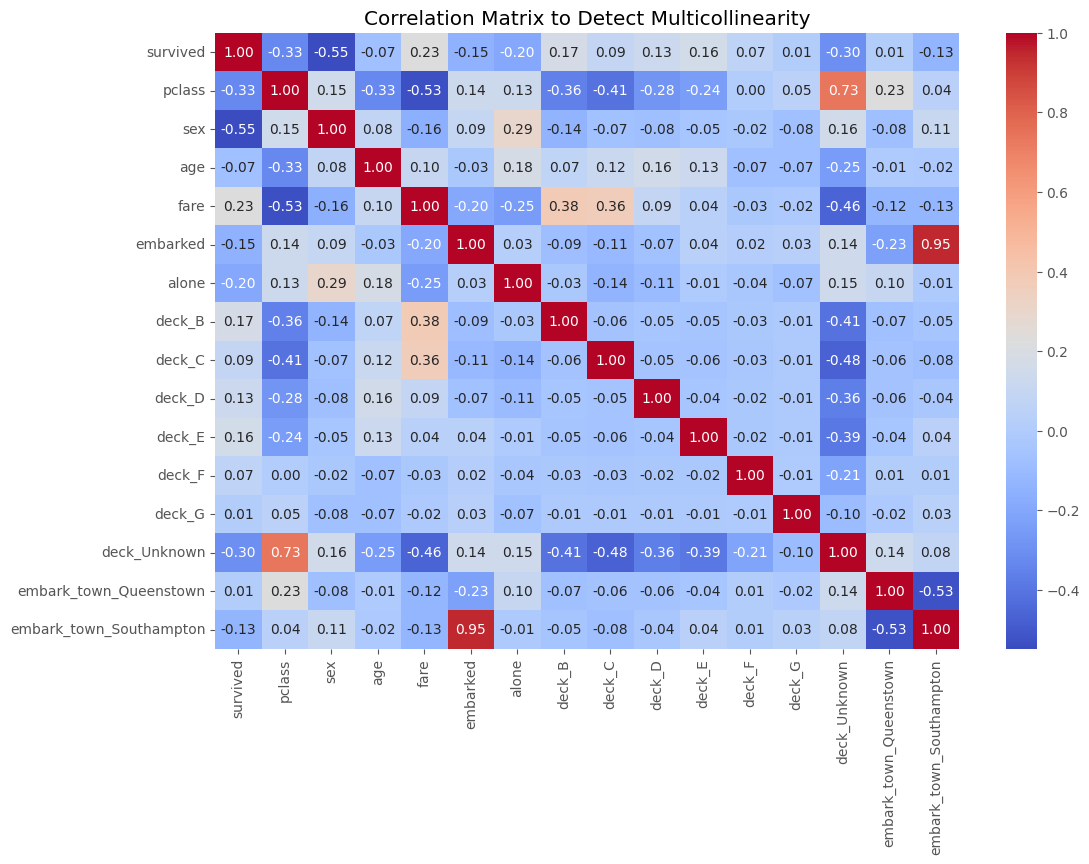

In [64]:
# Check for multicollinearity using correlation matrix
correlation_matrix = train.corr()

# Display the correlation matrix for multicollinearity assessment
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix to Detect Multicollinearity")
plt.show()


Areas of multi-collinearity::

`embark_town_Queenston` and `embarked_Cherbourg` show a strong positive correlation with `embarked`, whistle `embark_town_Southampton` is strongly negatively correlated with `embarked`. This suggests that including `embark_town` only as a feature should be enough to control for the influence of place of embarkment.

`deck_0` which is our `NaN` values, and `pclass` are perfectly positively correlated and negatively correlated with `fare`. This could mean different things. Perhaps is because deck numbers are correlated with ticket class and people without a ticket were all from certain class. Thus, dropping `deck_0` should be ok, as it is being taken into account by `pclass`. 

As expected, `sex` and `survived` also show strong positive correlation. 

Unsurprisingly, `fare` and `pclass` are strongly negatively correlated, so one will be dropped.

### Feature scaling

Finally, predictive features `X` and the target feature `y` can be separated, and `X` will be scaled with `StandardScaler` from `sklearn`.

In [65]:
from sklearn.preprocessing import StandardScaler

# Separating the target variable and features
X_train = train.drop(columns=['survived'])
y_train = train['survived']
X_test = test.drop(columns=['survived'])
y_test = test['survived']

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 4. Building a Machine Learning Model

### Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))


Random Forest Accuracy: 85.20%
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       139
           1       0.81      0.80      0.80        84

    accuracy                           0.85       223
   macro avg       0.84      0.84      0.84       223
weighted avg       0.85      0.85      0.85       223



## 5. Conclusion


As expected, `sex` and `age` are the main features by far, with a model accuracy of 79.37%, which could be improved by doing some hyper-parameter tunning.
After training and evaluating the Random Forest model:

Achieved accuracy is displayed.
Further improvement can be done with hyperparameter tuning (e.g., using GridSearchCV).